# <font color='green'><b> Shape processing </b></font>

### Credits: Hands-on Image Processing with Python, Chapter 1 - Author: Sandipan Dey




### <font color='green'><b>Import libraries</b></font>

TUTORIALS: 
- pilow: https://pillow.readthedocs.io/en/stable/
- skimage: https://scikit-image.org/docs/stable/
- matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html
- numpy: https://numpy.org/devdocs/user/quickstart.html
- os: https://www.tutorialsteacher.com/python/os-module
- plotly: https://plotly.com/python/getting-started/
 

In [11]:
import numpy as np
import matplotlib.pylab as plt
import plotly.express as px   
import cv2

In [12]:
#MODIFY THESE PATHS TO POINT TO YOUR IMAGES
img_dir = '../Immagini_IN/'
out_dir = '../Immagini_OUT/'

## <font color='green'><b> 1 - Image Resizing </b></font>

[All equivalents]


### 1.1 Resizing an image with *OPENCV*  using the function `resize()`



Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes. You can resize an input image either of following methods:

340 453
Image dimensions before: (340, 453, 3)and after scaling factor application: (680, 1359, 3)


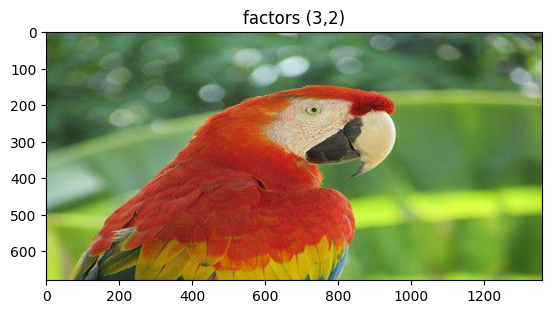

Image dimensions before: (340, 453, 3)and after explicit scaling: (100, 200, 3)


Text(0.5, 1.0, 'explicit size (200, 100)')

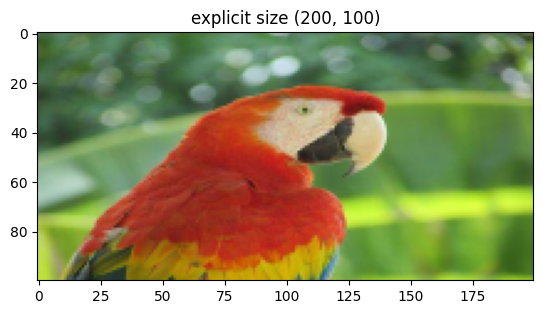

In [13]:
import cv2
from skimage.io import imread, imsave, imshow #, imread_collection, imshow_collection

im = imread(img_dir + "parrot.png") # read image from disk, provide the correct path
[cols, rows, channels] = im.shape
print(cols, rows)

res1 = cv2.resize(im, None, fx=3, fy=2, interpolation = cv2.INTER_CUBIC)
print("Image dimensions before: "+  str(im.shape) + "and after scaling factor application: "+ str(res1.shape))
plt.imshow(res1)
plt.title('factors (3,2)')
plt.imshow(res1)
plt.show()

#OR
res2 = cv2.resize(im,(200, 100), interpolation = cv2.INTER_AREA) # PAY ATTENTION TO THE DIMENSION ORDER: (W, H)!!!
print("Image dimensions before: "+  str(im.shape) + "and after explicit scaling: "+ str(res2.shape))
plt.imshow(res2)
plt.title('explicit size (200, 100)')

### 1.2 Resizing an image with *PIL*  using the function `resize()`


(-0.5, 1069.5, 1049.5, -0.5)

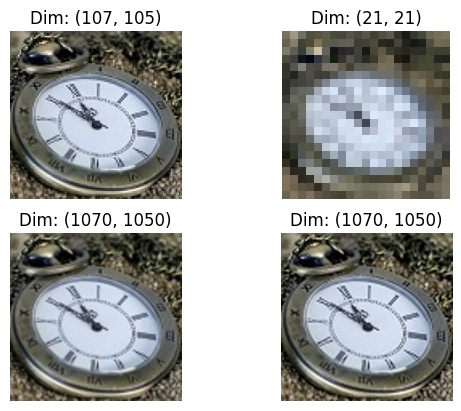

In [14]:
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat 
from PIL.Image import Resampling, Transform

im = Image.open(img_dir + "clock.jpg")
 
#ZOOM IN
im_small = im.resize((im.width//5, im.height//5), Resampling.LANCZOS)  

#ZOOM OUT
im_largeLIN = im.resize((im.width*10, im.height*10),  Resampling.BILINEAR)  
im_largeCUB = im.resize((im.width*10, im.height*10),  Resampling.BICUBIC)  

plt.subplot(2,2,1)
plt.title("Dim: (" + str(im.width) + ", "  + str(im.height) + ")")
plt.imshow(im)
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Dim: (" + str(im_small.width) + ", "  + str(im_small.height) + ")")
plt.imshow(im_small)
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Dim: (" + str(im_largeLIN.width) + ", "  + str(im_largeLIN.height) + ")")
plt.imshow(im_largeLIN)
plt.axis('off')


plt.subplot(2,2,4)
plt.title("Dim: (" + str(im_largeCUB.width) + ", "  + str(im_largeCUB.height) + ")")
plt.imshow(im_largeCUB)
plt.axis('off') 

### <font color='green'><b> 1.3 Resizing an image with *SKIMAGE*  using `resize()` </b></font>

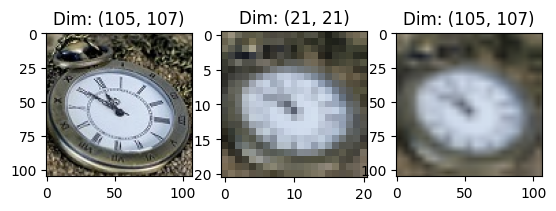

In [15]:
import skimage
from skimage.io import imread, imsave, imshow
from skimage.transform import resize, SimilarityTransform, warp, swirl

#from skimage.util import invert, random_noise, montage

im = imread(img_dir + "clock.jpg")
lx, ly, _ = im.shape  

#Downsampling:
imRid = resize(im, (lx // 5, ly // 5), anti_aliasing=True) #When downsampling anable anti-aliasing

#Upsampling:
imRep = resize(imRid, (lx, ly), anti_aliasing=False) 

plt.subplot(1,3,1)
plt.title("Dim: (" + str(lx) + ", "  + str(ly) + ")")
plt.imshow(im)

plt.subplot(1,3,2)
plt.title("Dim: (" + str(imRid.shape[0]) + ", "  + str(imRid.shape[1]) + ")")
plt.imshow(imRid)

plt.subplot(1,3,3)
plt.title("Dim: (" + str(imRep.shape[0]) + ", "  + str(imRep.shape[1]) + ")")
plt.imshow(imRep)


### <font color='green'><b>EXERCISE 1: </b></font>

Using the library `skimage`, and then:
- convert RGB to YCbCr, 
- apply a scale reduction of 10 times to the layers "Cb" and "Cr", 
- then scale up again, 
- reconstruct the YCbCr
- convert the image back to the RGB color space
- plot the original image and the reconstructed one.

- Answer this question: Is the image significantly degraded? If the answer is NO, we have implemented an image compressor! 
   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


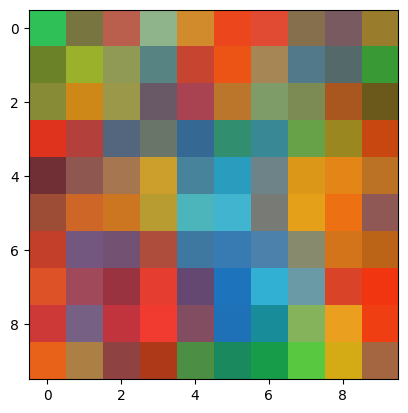

In [33]:
from skimage import color,  exposure, img_as_float, data

im = skimage.io.imread(img_dir + "balls1.jpg")
#plt.imshow(im)

x = color.rgb2ycbcr(im)
plt.imshow(x)


imRid = resize(im, (lx // 10, ly // 10), anti_aliasing=True)


imRep = resize(imRid, (lx, ly), anti_aliasing=False)
plt.imshow(imRep)

## <font color='green'><b>2 Image manipulations </b></font>  



### <font color='green'><b> - 2.1 Image manipulation with *OpenCV* </b></font>

#### <font color='green'><b>  *Geometric Transformation* </b></font>
<font color='green'><b>- **Translation**</b></font>

Translation is the shifting of object's location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, you can create the transformation matrix as follows:

$T = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \end{bmatrix}$

In [17]:
tx = 100
ty = 50
T = np.float32([[1,0,tx],[0,1,ty]])
print(T)
 
[height, width, chan] = im.shape

dst = cv2.warpAffine(im,T,(width+tx , height+ty))
# show image
fig = px.imshow(dst)
fig.show() 

[[  1.   0. 100.]
 [  0.   1.  50.]]


<font color='green'><b>- **Rotation**</b></font>

Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form:
$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta   \end{bmatrix}$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

$\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ - \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y \end{bmatrix}$
where:

$\begin{array}{l} \alpha =  scale \cdot \cos \theta , \\ \beta =  scale \cdot \sin \theta \end{array}$

To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D. Check below example which rotates the image by 90 degree with respect to center without any scaling.




[[  0.39073113   0.92050485 -15.73062018]
 [ -0.92050485   0.39073113  81.23362541]]


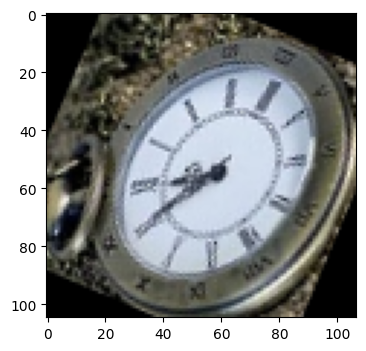

In [18]:
[rows, cols, channels] = im.shape
theta= 67 #rotation angle
rotCenter = (cols/2,rows/2)
scale =1

M = cv2.getRotationMatrix2D(rotCenter,theta,scale)
print(M)
dst = cv2.warpAffine(im, M, (cols,rows))

plt.figure(figsize=(4,4))
plt.imshow(dst)

#### <font color='green'><b> *Affine Transformation* </b></font>
 

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then `cv2.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv2.warpAffine`.

Check below example, and also look at the points I selected (which are marked in Green color):

In [19]:
fig = px.imshow(im)

# Set the figure dimensions
fig.update_layout(
    width=400,  # Set the width of the figure
    height=300  # Set the height of the figure
)

# Show the figure
fig.show()

In [20]:
#Set the position on the image you want to to move
x1 = [245,100, 300]
y1 = [110, 200, 250]
pts_img = np.float32([[x1[0],y1[0]],[x1[1],y1[1]], [x1[2],y1[2]]])  #(c,r)

#Set the destination positions 
x2 = [245,50, 400]
y2 = [50, 300, 300]
pts_dest = np.float32([[x2[0],y2[0]],[x2[1],y2[1]], [x2[2],y2[2]]])  #(c,r)

#show the point
fig, ax = plt.imshow(figsize=(4,4))
ax.imshow(im)
ax.scatter(x1, y1, c='blue', s=10)   
ax.scatter(x2, y2, c='red', s=10)   
plt.show()

#compute and apply the affine transformation
M = cv2.getAffineTransform(pts_img,pts_dest)
print("Affine Transformation Matrix: ")
print(M)


dst = cv2.warpAffine(im,M,(round(cols*1.6),round(rows*1.5)))
px.imshow(dst) 

TypeError: imshow() missing 1 required positional argument: 'X'

### <font color='green'><b>EXERCISE 2: </b></font>

Given the image `me5.jpg`, apply the affine transform so that in the transformed image:
- the left eye has coordinates [90,175], 
- the right eye has coordinates [200,175],
- and the mouth has coordinates [145,310].

Ones the image is transformed crop a a subimage corresponding to the upper left rectangle of dimensios (400 x 350), and save it as `me5_cropped.jpg` 

HINT: exploit the interactive visualization `px.imshow()` to know the facial feature coordinates.
 


In [ ]:
im =  imread(img_dir + "me5.jpg") # read image from disk, provide the correct path

[rows, cols, channels] = im.shape
px.imshow(im)

In [ ]:
#TO DO  

## - 2.2 Image manipulation  with *PIL*

In [ ]:
im = Image.open(img_dir + "parrot.png") # open the image, provide the correct path
print(im.width, im.height, im.mode, im.format) # print image size, mode and format

453 340 RGB PNG


### - Cropping an image  


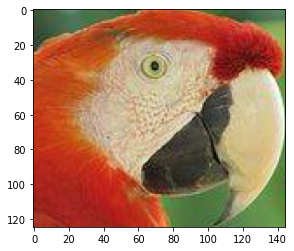

In [ ]:
im_c = im.crop((175,75,320,200)) # crop the rectangle given by (left, top, right, bottom) from the image
plt.imshow(im_c)


### - Reflecting an image

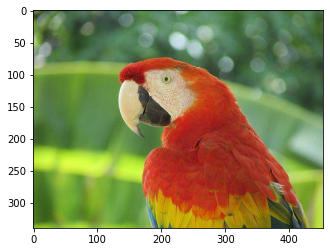

In [ ]:
imT = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
plt.imshow(imT)

### -  Rotating an image

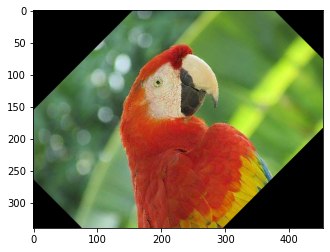

In [ ]:
im_45 = im.rotate(45) # rotate the image by 45 degrees
plt.imshow(im_45) # show the rotated image

### -   Applying an Affine transformation on an image

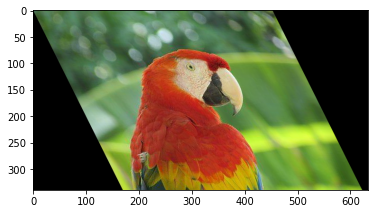

In [ ]:
im = Image.open(img_dir + "parrot.png")
 
im_Aff = im.transform((int(1.4*im.width), im.height), Transform.AFFINE, 
             data=(1,-0.5,0,0,1,0)) # shear (a x + b y + c, d x + e y + f)
plt.imshow(im_Aff)


### - Perspective transformation

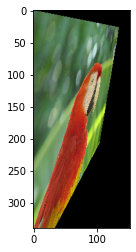

In [ ]:
params = [1, 0.1, 0, -0.1, 0.5, 0, -0.005, -0.001]
 
im1 = im.transform((im.width//3, im.height), Transform.PERSPECTIVE, params,  
Resampling.BICUBIC)  

plt.imshow(im1)

### - α-blending two images  in *PIL*


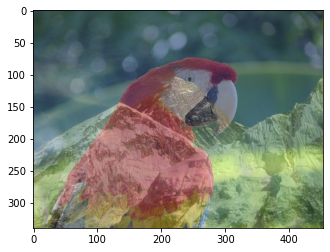

In [ ]:
im1 = Image.open(img_dir + "parrot.png")
im2 = Image.open(img_dir + "hill.png")
im1 = im1.convert('RGBA') # two images have different modes, must be converted to the same mode
im2 = im2.resize((im1.width, im1.height), Resampling.BILINEAR) # two images have different sizes, must be converted to the same size
im = Image.blend(im1, im2, alpha=0.5)
plt.imshow(im)

## <font color='green'><b>EXERCISE 3:  </b></font> 

Try morphing the images "me5.jpg" and "ronaldo.jpg" 
- Hint1: work on images AFTER having applied a common affine transformation so that eyes and mouth are in corrispondence
- Hint2: image must have the same dimensions!
- Hint3: blending requires working on real values
 

In [ ]:
from skimage import img_as_float, img_as_ubyte
#TO DO 

## <font color='green'><b>Detect facial landmark automatically with mediapipe  </b></font> 

![Esempio GIF](./mediapipe.gif)

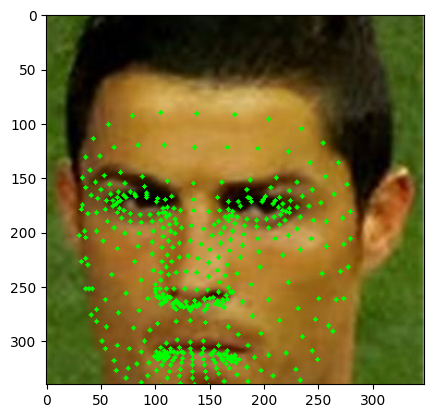

In [ ]:
from skimage import color,img_as_float, img_as_ubyte
import mediapipe as mp

# Inizializza il modulo MediaPipe Face
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Carica un'immagine
 
image = imread( img_dir + "ronaldo.jpg")
  
# Rileva i landmark del viso nell'immagine
results = face_mesh.process(image)

# Verifica se sono stati rilevati landmark del viso
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Cicla attraverso i landmark del viso
        for i, landmark in enumerate(face_landmarks.landmark):
            x, y, _ = image.shape  # Dimensioni dell'immagine
            x = int(landmark.x * x)
            y = int(landmark.y * y)
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Disegna un cerchio per ogni landmark

# Salva l'immagine con i landmark disegnati
 
plt.imshow(image)

# Rilascia le risorse
face_mesh.close()

## <font color='green'><b>Define a function that show and return the eyes and mouth centers, explointing mediapipe
  </b></font> 

(345, 183)
(381, 180)
(363, 217)


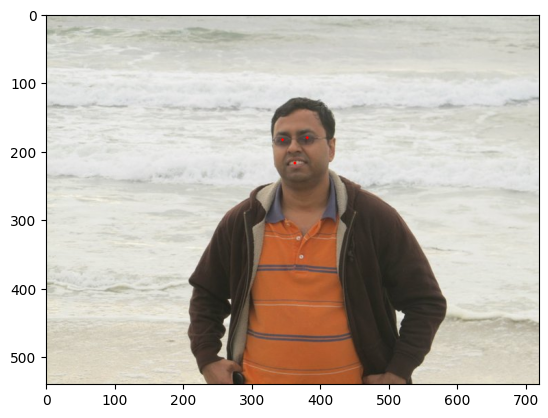

In [ ]:
def facial_landmarks(image):

    # Inizializza il modulo MediaPipe per il rilevamento dei landmark del viso
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh()

    
    # Converte l'immagine in scala di grigi
    gray = color.rgb2gray(image)

    # Esegui il rilevamento dei landmark del viso
    if image.dtype == float:
        image = img_as_ubyte(image)
        
    results = face_mesh.process(image)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Estrai le coordinate degli occhi e della bocca dai landmark
            left_eye = (int(face_landmarks.landmark[159].x * image.shape[1]), int(face_landmarks.landmark[159].y * image.shape[0]))
            right_eye = (int(face_landmarks.landmark[386].x * image.shape[1]), int(face_landmarks.landmark[386].y * image.shape[0]))
            mouth = (int(face_landmarks.landmark[13].x * image.shape[1]), int(face_landmarks.landmark[14].y * image.shape[0]))

            # Disegna cerchi intorno agli occhi e alla bocca
            cv2.circle(image, left_eye, 2, (255, 0, 0), -1)
            cv2.circle(image, right_eye, 2, (255, 0, 0 ), -1)
            cv2.circle(image, mouth, 2, (255, 0, 0), -1)

    # Visualizza l'immagine con i cerchi intorno agli occhi e alla bocca
    plt.imshow(image)
 
    return left_eye,right_eye,mouth

image = imread( img_dir + "me5.jpg")
[left_eye,right_eye,mouth] = facial_landmarks(image) 
print(left_eye)
print(right_eye)
print(mouth)


##  3 Miscellaneous



 - Image Masking with *NUMPY*  


  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



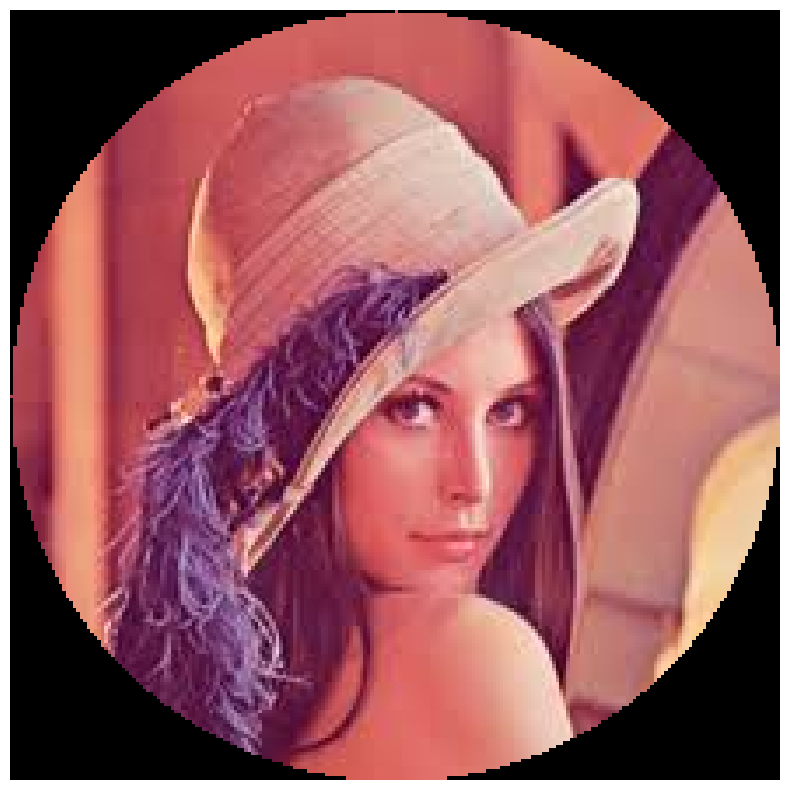

(<matplotlib.image.AxesImage at 0x152cd4e50>, (-0.5, 219.5, 219.5, -0.5), None)

In [ ]:

lena = imread(img_dir + "lena.jpg") # read the image from disk as a numpy ndarray  
print(lena.flags) 
#if you are the owner of the image, you can set the image to WRITABLE as: 
#   img.setflags(write=1)
#else make a copy: 
lena = lena.copy()
print(lena.flags)

lx, ly, _ = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
lena[mask,:] = 0 # masks
plt.figure(figsize=(10,10))
plt.imshow(lena), plt.axis('off'), plt.show()

- Creating a thumbnail  
 

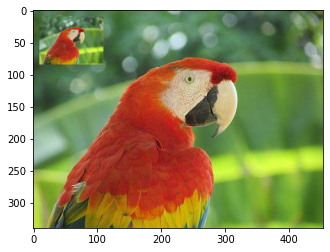

In [ ]:
im = Image.open(img_dir + "parrot.png")
im_thumbnail = im.copy() # need to copy the original image first
im_thumbnail.thumbnail((100,100)) # now paste the thumbnail on the image
im.paste(im_thumbnail, (10,10))
im.save( out_dir + "parrot_thumb.jpg")
plt.imshow(im)

-  Inverse warping and geometric transformation using the warp() function

In [ ]:
im = imread(img_dir + "parrot.png")
tform = SimilarityTransform(scale=0.9,
rotation=np.pi/4,translation=(im.shape[0]/2, -100))
warped = warp(im, tform)
import matplotlib.pyplot as plt
plt.imshow(warped), plt.axis('off'), plt.show()

- Applying the swirl transform

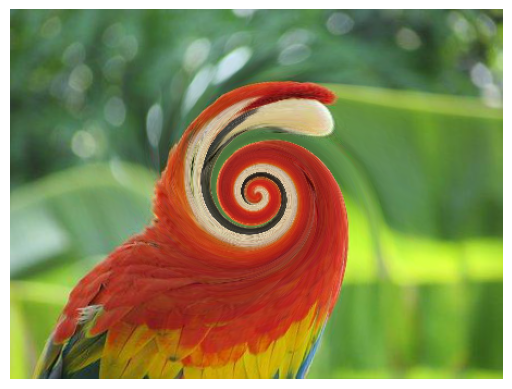

In [ ]:
im = imread(img_dir + "parrot.png")
swirled = swirl(im, rotation=0, strength=15, radius=200)
plt.imshow(swirled)
plt.axis('off')
plt.show()

# If not enough... look at the scipy library:

In [ ]:
from scipy.ndimage import affine_transform, zoom 